Best parameters: {'classifier__alpha': 0.001, 'classifier__max_iter': 1000}
Best cross-validated precision (macro): 0.5795607733836753
Accuracy: 0.5130868082874377
Precision (Macro): 0.5538854884160952


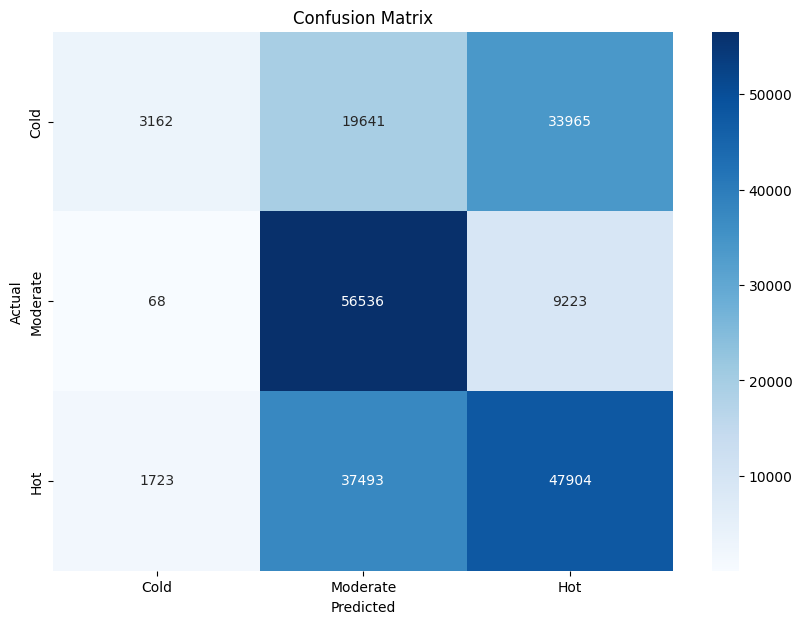

In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import SGDClassifier  # Using SGD Classifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = 'temp-data.csv'
data = pd.read_csv(data_path)

# Data Processing: Dropping the 'State' column
data = data.drop(['State'], axis=1)

# Define temperature categories
def temperature_category(temp):
    if temp < 50:
        return 'cold'
    elif temp < 75:
        return 'moderate'
    else:
        return 'hot'

# Apply the function to create a new categorical column
data['TempCategory'] = data['AvgTemperature'].apply(temperature_category)

# Define features and target
X = data[['Region', 'Country', 'City', 'Month', 'Day', 'Year']]  # Features
y = data['TempCategory']  # Multi-class target

# Preprocessing Steps
categorical_features = ['Region', 'Country', 'City']
numerical_features = ['Month', 'Day', 'Year']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Feature Selection: Select the top features
selection = SelectKBest(f_classif, k=10)  # Reduce 'k' based on feature importance

# Define the model with a more efficient approach during grid search
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', selection),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', random_state=2))  # Approximating linear SVM
])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Reduce parameter grid and CV folds
param_grid = {
    'classifier__alpha': [0.0001, 0.001, 0.01],  # Similar to inverse of C in SVM
    'classifier__max_iter': [1000, 3000]  # Adjust maximum iterations
}


# Training
# Using GridSearchCV with reduced CV folds, optimizing for precision (note: adjust based on your class labels)
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='precision_macro')  # Use 'precision_macro' for balanced precision across all classes
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated precision (macro):", grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))  # Macro-average precision

# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Loading data from "/content/drive/MyDrive/MLProject/data/"

In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import SGDClassifier  # Using SGD Classifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = '/content/drive/MyDrive/MLProject/data/temp-data.csv'
data = pd.read_csv(data_path)
data = data.drop(['State'], axis=1)

In [ ]:
# Data Processing: Dropping the 'State' column
classes = ['Cold', 'Semi-Cold', 'Moderate', 'Semi-Hot', 'Hot']
# Define temperature categories
def temperature_category(temp):
    if temp < 48:
        return classes[0]
    elif temp < 55:
        return classes[1]
    elif temp < 70:
        return classes[2]
    elif temp < 80:
        return classes[3]
    else:
        return classes[4]

# Apply the function to create a new categorical column
data['TempCategory'] = data['AvgTemperature'].apply(temperature_category)

In [ ]:
data['TempCategory'].value_counts()

Moderate     271636
Cold         256858
Hot          213252
Semi-Hot     209057
Semi-Cold     97772
Name: TempCategory, dtype: int64

In [ ]:
# Define features and target
X = data[['Region', 'Country', 'City', 'Month', 'Day', 'Year']]  # Features
y = data['TempCategory']  # Multi-class target

# Preprocessing Steps
categorical_features = ['Region', 'Country', 'City']
numerical_features = ['Month', 'Day', 'Year']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Feature Selection: Select the top features
selection = SelectKBest(f_classif, k=50)  # Reduce 'k' based on feature importance

# Define the model with a more efficient approach during grid search
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', selection),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', random_state=2))  # Approximating linear SVM
])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Reduce parameter grid and CV folds
param_grid = {
    'classifier__alpha': [0.0001, 0.001, 0.01],  # Similar to inverse of C in SVM
    'classifier__max_iter': [1000, 3000]  # Adjust maximum iterations
}

# Training
# Using GridSearchCV with reduced CV folds, optimizing for precision (note: adjust based on your class labels)
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='precision_macro')  # Use 'precision_macro' for balanced precision across all classes
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Month',
                                                                          'Day',
                                                                          'Year']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Region',
                                                                          'Country',
                                                                          'City'])])),
                                       ('feature_selection', SelectKBest(k=50)),
                                       ('classifier',
                                        SGDClassifier(random_state=2))]),
             param_grid={'classifier__alpha': [0.0001, 0.001, 0.01],
                         'classifier__max_iter': [1000, 3000]},
             scoring='precision_macro')

In [ ]:
y_test.value_counts()

Moderate     54213
Cold         51296
Hot          42885
Semi-Hot     41693
Semi-Cold    19628
Name: TempCategory, dtype: int64

Best parameters: {'classifier__alpha': 0.001, 'classifier__max_iter': 1000}
Best cross-validated precision (macro): 0.3899080424165216
Accuracy: 0.38839377250077484
Precision (Macro): 0.4358537034278491


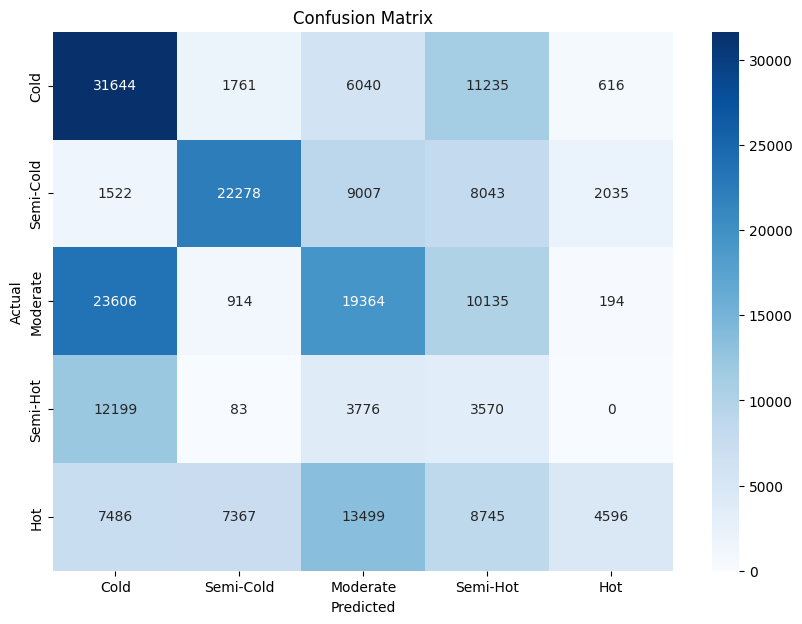

In [ ]:
# Output best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated precision (macro):", grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))  # Macro-average precision

# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()